# Feature selection with the Miscoding class

In [1]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from sklearn.feature_selection import mutual_info_regression

In [2]:
rcParams['figure.figsize'] = 10, 5

In [3]:
from fastautoml.fastautoml import Miscoding

/home/rleiva/anaconda3/envs/sklearn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
from sklearn.datasets import make_classification

### Comparison of the miscoding of random distributions

In [5]:
from scipy.stats import norm, expon

Let's y follow normal distribution, x1 be a predictor following y with some noise, and x2 be a second predictor following a different distribution.

In [6]:
y  = norm.rvs(loc=3, scale=1, size=10000)
x1 = y + norm.rvs(loc=3, scale=1, size=10000) / 10
x2 = expon.rvs(size=10000)
X = np.column_stack((x1, x2))

Let's compute the miscoding of x1 and x2

In [7]:
miscoding = Miscoding()
miscoding.fit(X, y)

Miscoding()

In [9]:
miscoding.miscoding_features(mode="regular")

array([0.28465697, 0.60091012])

As expected, the miscoding of x1 is smaller than x2.

But normally we work with the default "adjusted" version of miscoding, so we can compare the results with other techniques.

In [11]:
miscoding.miscoding_features()

array([0.64188972, 0.35811028])

Another example with redundant features

In [12]:
y  = norm.rvs(loc=3, scale=1, size=10000)
x0 = y + norm.rvs(loc=3, scale=1, size=10000) / 10  # Good
x1 = y + norm.rvs(loc=3, scale=1, size=10000)       # Good enough
x2 = x1 + 0.1                     # Redundant wrt x1
x3 = expon.rvs(size=10000)        # Not relevant
x4 = x3 + 0.1                     # Redundant wrt x3
x5 = np.random.randn(10000)       # Not relevant
X  = np.column_stack((x0, x1, x2, x3, x4, x5))

n_features = 6

In [13]:
miscoding.fit(X, y)

Miscoding()

In [14]:
mscd = miscoding.miscoding_features(redundancy=False)

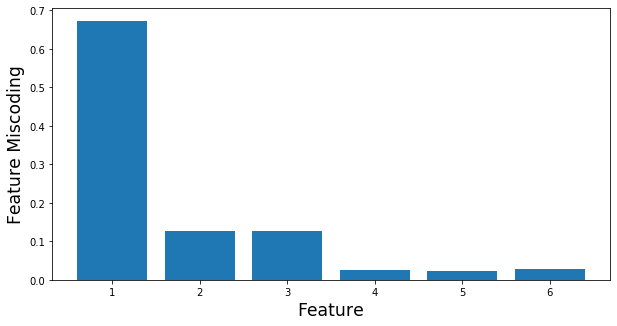

In [12]:
plt.bar(x=np.arange(0, n_features), height=mscd, tick_label=np.arange(1, n_features+1))
plt.xlabel("Feature", fontsize="xx-large")
plt.ylabel("Feature Miscoding", fontsize="xx-large")
plt.show()

In [13]:
mscd = miscoding.miscoding_features()

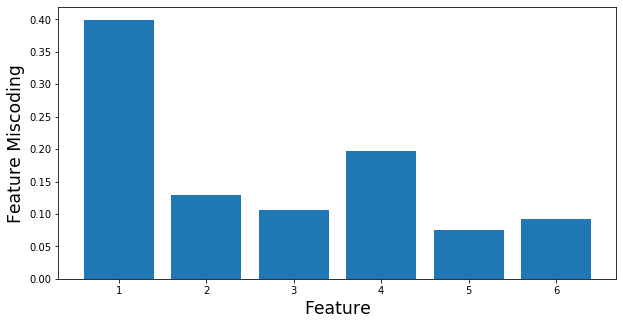

In [14]:
plt.bar(x=np.arange(0, n_features), height=mscd, tick_label=np.arange(1, n_features+1))
plt.xlabel("Feature", fontsize="xx-large")
plt.ylabel("Feature Miscoding", fontsize="xx-large")
plt.show()

As it was expected, there are four of them which are the most relevant.

Compare with correlation

In [15]:
df = pd.DataFrame(X)
df['y'] = y
corr = df.corr()

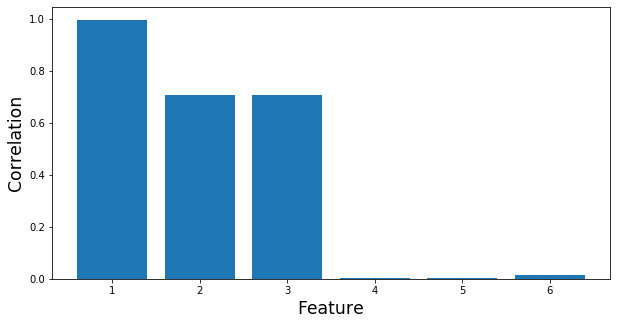

In [16]:
plt.bar(x=np.arange(0, n_features), height=abs(corr['y'][:-1].values), tick_label=np.arange(1, n_features+1))
plt.xlabel("Feature", fontsize="xx-large")
plt.ylabel("Correlation", fontsize="xx-large")
plt.show()

Correlation is only able to identify tree of the four relevant features.

Compare with mutual information

In [17]:
mir = mutual_info_regression(X, y)

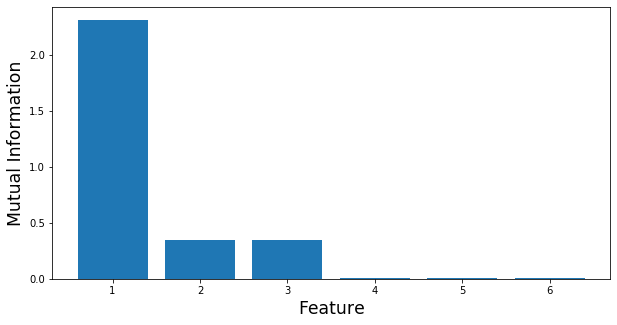

In [18]:
plt.bar(x=np.arange(0, n_features), height=mir, tick_label=np.arange(1, n_features+1))
plt.xlabel("Feature", fontsize="xx-large")
plt.ylabel("Mutual Information", fontsize="xx-large")
plt.show()

### Feature evaluation

Generate 1000 random points belonging to 10 gaussian blobs, described by 20 features, from which only 4 are informative.

In [19]:
n_samples     = 1000
n_features    = 20
n_informative = 4
n_redundant   = 0
n_classes     = 10

In [20]:
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, n_repeated=0, n_classes=n_classes, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)

Let's visualize a projection of the data in a two dimensional space.

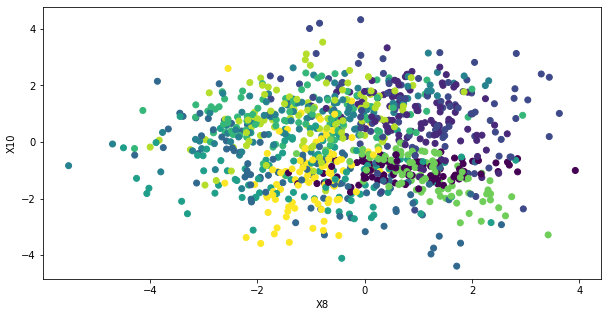

In [21]:
plt.scatter(X[:,7], X[:,9], c=y)
plt.xlabel("X8")
plt.ylabel("X10")
plt.show()

In [22]:
miscoding = Miscoding()
miscoding.fit(X, y)

Miscoding()

Let's compute the miscoding of all the features.

In [23]:
mscd = miscoding.miscoding_features(mode='adjusted')

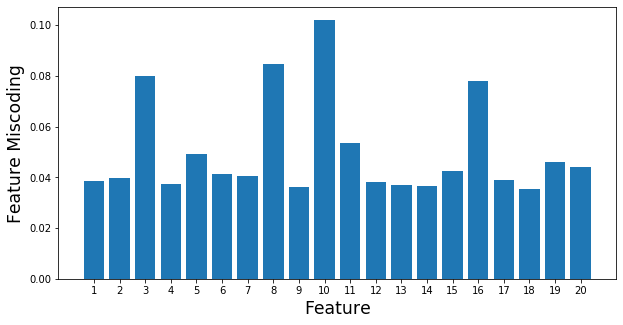

In [24]:
plt.bar(x=np.arange(0, n_features), height=mscd, tick_label=np.arange(1, n_features+1))
plt.xlabel("Feature", fontsize="xx-large")
plt.ylabel("Feature Miscoding", fontsize="xx-large")
plt.show()

As it was expected, there are four of them which are the most relevant.

Compare with correlation

In [25]:
df = pd.DataFrame(X)
df['y'] = y
corr = df.corr()

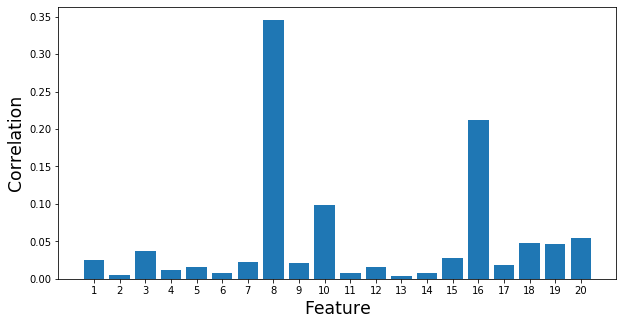

In [26]:
plt.bar(x=np.arange(0, n_features), height=abs(corr['y'][:-1].values), tick_label=np.arange(1, n_features+1))
plt.xlabel("Feature", fontsize="xx-large")
plt.ylabel("Correlation", fontsize="xx-large")
plt.show()

Correlation is only able to identify tree of the four relevant features.

Compare with mutual information

In [27]:
mir = mutual_info_regression(X, y)

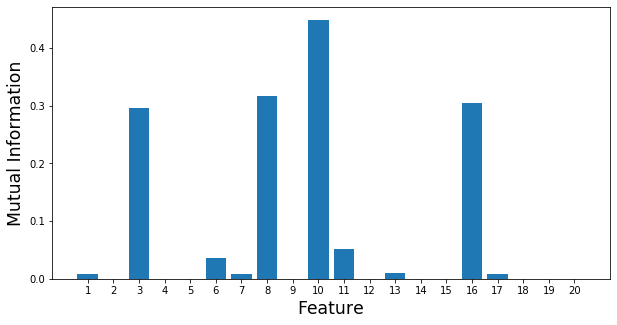

In [28]:
plt.bar(x=np.arange(0, n_features), height=mir, tick_label=np.arange(1, n_features+1))
plt.xlabel("Feature", fontsize="xx-large")
plt.ylabel("Mutual Information", fontsize="xx-large")
plt.show()

Mutual information works much better than correlation.

### Feature evaluation with redundancy

Generate 1000 random points belonging to 10 gaussian blobs, described by 20 features, with 4 informative and 4 redundant.

In [29]:
n_samples     = 10000
n_features    = 20
n_informative = 4
n_redundant   = 4
n_classes     = 2

In [30]:
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, n_repeated=0, n_classes=n_classes, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)

In [31]:
miscoding = Miscoding()
miscoding.fit(X, y)

Miscoding()

Let's compute the miscoding of all the features.

In [32]:
mscd = miscoding.miscoding_features(mode='adjusted')

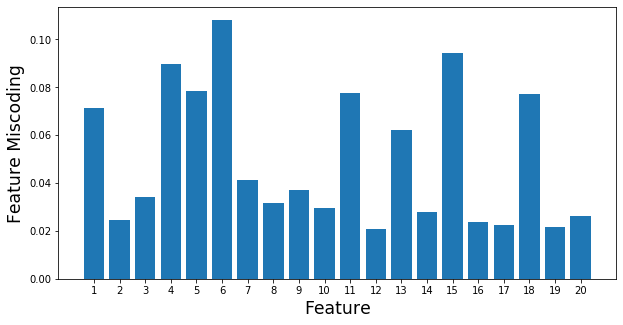

In [33]:
plt.bar(x=np.arange(0, n_features), height=mscd, tick_label=np.arange(1, n_features+1))
plt.xlabel("Feature", fontsize="xx-large")
plt.ylabel("Feature Miscoding", fontsize="xx-large")
plt.show()

Compare with mutual information

In [34]:
mir = mutual_info_regression(X, y)

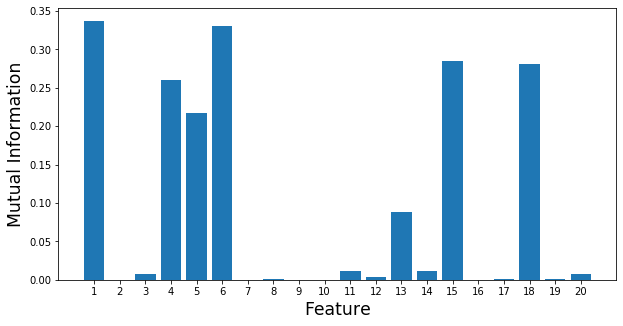

In [35]:
plt.bar(x=np.arange(0, n_features), height=mir, tick_label=np.arange(1, n_features+1))
plt.xlabel("Feature", fontsize="xx-large")
plt.ylabel("Mutual Information", fontsize="xx-large")
plt.show()

### Feature selection

Generate 1000 random points belonging to 10 gaussian blobs, described by 20 features, from which 14 are informative.

In [36]:
n_samples     = 1000
n_features    = 20
n_informative = 14
n_classes     = 10

In [37]:
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=0, n_repeated=0, n_classes=n_classes, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)

In [38]:
miscoding = Miscoding()
miscoding.fit(X, y)

Miscoding()

In [39]:
tcc = miscoding.miscoding_features(mode='regular')
mscd = miscoding.miscoding_features(mode='partial')

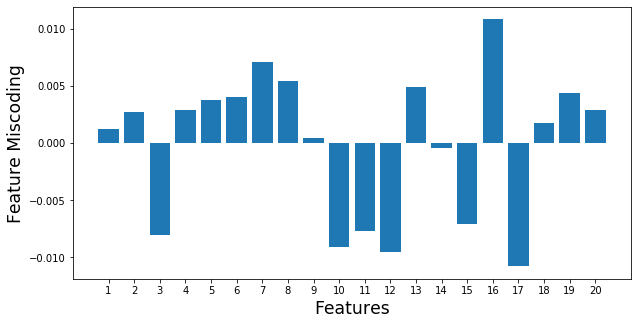

In [40]:
plt.bar(x=np.arange(0, n_features), height=mscd, tick_label=np.arange(1, n_features+1))
plt.xlabel("Features", fontsize="xx-large")
plt.ylabel("Feature Miscoding", fontsize="xx-large")
plt.show()

Order the features accoring to its miscoding. We should use only those features whith a positive miscoding.

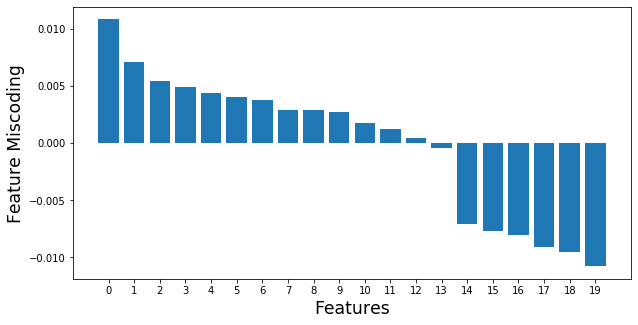

In [41]:
indices = np.argsort(tcc)
plt.bar(x=np.arange(0, n_features), height=mscd[indices], tick_label=np.arange(0, n_features))
plt.xlabel("Features", fontsize="xx-large")
plt.ylabel("Feature Miscoding", fontsize="xx-large")
plt.show()

Let's see how the miscoding of the dataset evolves when we add more features to our study.

In [42]:
tmp = mscd
val = list()
curr = 1
for i in range(0, n_features):
    curr = curr - max(tmp)
    val.append(curr)
    tmp = tmp[np.where(tmp != max(tmp))]

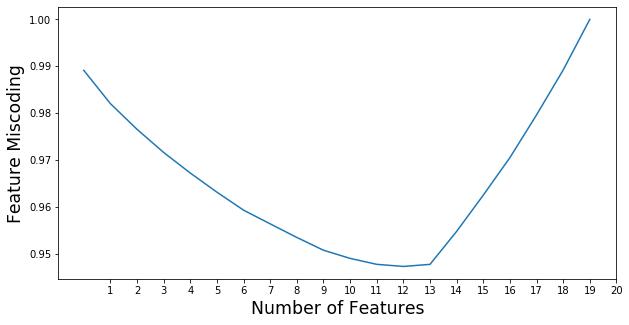

In [43]:
plt.plot(np.arange(0, n_features), val)
plt.xlabel("Number of Features", fontsize="xx-large")
plt.xticks(np.arange(1, n_features+1))
plt.ylabel("Feature Miscoding", fontsize="xx-large")
plt.show()

As expected, the miscoding of the dataset decreases when we add relevant features, but it start to increases again when we add non-relevan features.

### Optimal subset selection

Let's train a neural network with the full dataset and the optimal subset computed using the miscoding class.

In [44]:
import numpy  as np

from fastautoml.fastautoml import Miscoding

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits

data = load_digits()
X_raw = data.data
y_raw = data.target

miscoding = Miscoding()
miscoding.fit(X_raw, y_raw)
mscd = miscoding.miscoding_features(mode='partial')
X_red = X_raw[:,np.where(mscd > 0)[0]]
y_red = y_raw

X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=.3)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=.3)

clf = MLPClassifier(alpha=1, max_iter=1000)

clf.fit(X_raw_train, y_raw_train)
score_raw = clf.score(X_raw_test, y_raw_test)
        
clf.fit(X_red_train, y_red_train)
score_red = clf.score(X_red_test, y_red_test)
        
reduction = 1 - X_red_train.shape[1] / X_raw_train.shape[1]

print("Score raw:", score_raw, " Score Miscoding:", score_red, " Data Reduction:", reduction)

Score raw: 0.9814814814814815  Score Miscoding: 0.9777777777777777  Data Reduction: 0.421875


As we can see, both models provide the same score, however the dataset used with miscoding is much smaller.